# Medical Image Classification for Pneumonia
## 1. Tensorflow with custom CNN

## Dataset

In [ ]:
# Setting Directory
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Import Libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dropout,Flatten,Dense,BatchNormalization
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import cv2

In [ ]:
# Load Dataset
!unzip -qq "/content/drive/MyDrive/Colab Notebooks/ChestXRay2017.zip"

replace chest_xray/.DS_Store? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
# Count the number of images
from glob import glob

filepaths_train = list(glob('/content/chest_xray/train/*/*.jpeg'))
len(filepaths_train)

5232

In [ ]:
filepaths_test = list(glob('/content/chest_xray/test/*/*.jpeg'))
len(filepaths_test)

624

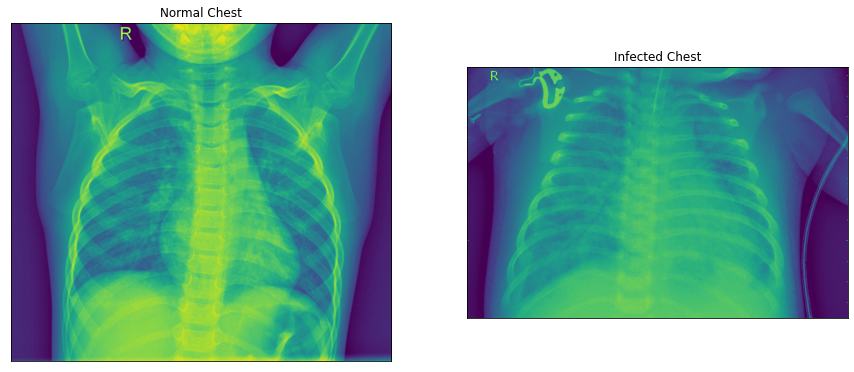

In [ ]:
# See Images
NORMAL='/content/chest_xray/train/NORMAL/IM-0115-0001.jpeg'
PNEUMONIA='/content/chest_xray/train/PNEUMONIA/person1000_bacteria_2931.jpeg'
plt.figure(1, figsize = (15 , 7))
plt.subplot(1 , 2 , 1)
plt.imshow(plt.imread(NORMAL))
plt.title('Normal Chest')
plt.xticks([]) , plt.yticks([])

plt.subplot(1 , 2 , 2)
plt.imshow(plt.imread(PNEUMONIA))
plt.title('Infected Chest')
plt.xticks([]) , plt.yticks([])

plt.show()

In [ ]:
width = 64
height = 64
datagen = ImageDataGenerator(rescale=1/255.0,
                             rotation_range = 30,
                             shear_range=0.2,
                             zoom_range=0.4,
                             vertical_flip =True,
                             horizontal_flip =True)

In [ ]:
trainDatagen = datagen.flow_from_directory(directory='/content/chest_xray/train/', 
                                           target_size=(width,height),
                                           class_mode = 'binary',
                                           batch_size = 32)

Found 5232 images belonging to 2 classes.


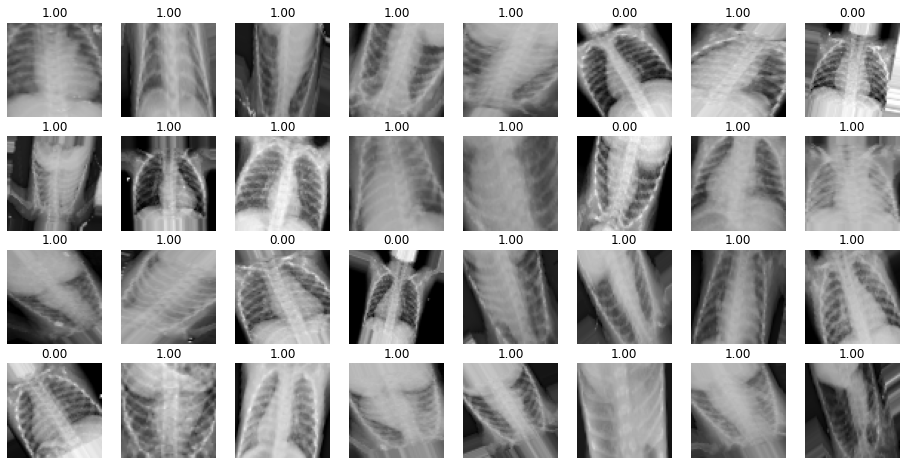

In [ ]:
augs = trainDatagen.__getitem__(0)

plt.figure(figsize=(16, 8))
for i, img in enumerate(augs[0]):
    plt.subplot(4, 8, i+1)
    plt.title('%.2f' % augs[1][i])
    plt.axis('off')
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img.squeeze())

In [ ]:
testDatagen = datagen.flow_from_directory(directory='/content/chest_xray/test',
                                           target_size=(width,height),
                                           class_mode = 'binary',
                                           batch_size = 32)

Found 624 images belonging to 2 classes.


## CNN Model

In [ ]:
# Define the Model
model = keras.Sequential([
    keras.layers.Conv2D(16,(5,5), input_shape=(width,height,3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Conv2D(32,(5,5), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(4,4)),
    keras.layers.Conv2D(64,(5,5), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 60, 60, 16)        1216      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 30, 30, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        12832     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 32)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 2, 2, 64)          51264     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 1, 1, 64)         0

In [ ]:
# Train model
model.fit(trainDatagen, epochs = 5, batch_size=32)

Epoch 1/5
164/164 [==============================] - 52s 317ms/step - loss: 0.2922 - accuracy: 0.8718
Epoch 2/5
164/164 [==============================] - 53s 324ms/step - loss: 0.2586 - accuracy: 0.8874
Epoch 3/5
164/164 [==============================] - 52s 316ms/step - loss: 0.2627 - accuracy: 0.8863
Epoch 4/5
164/164 [==============================] - 52s 316ms/step - loss: 0.2586 - accuracy: 0.8895
Epoch 5/5
164/164 [==============================] - 53s 324ms/step - loss: 0.2489 - accuracy: 0.8886


# Report accuracy from training/test data

In [ ]:
train_loss, train_acc = model.evaluate(trainDatagen, verbose=2)
print('\nAccuracy:', train_acc)

164/164 - 51s - loss: 0.2182 - accuracy: 0.9090 - 51s/epoch - 311ms/step

Accuracy: 0.9090213775634766


In [ ]:
test_loss, test_acc = model.evaluate(testDatagen, verbose=2)
print('\nAccuracy:', test_acc)

20/20 - 5s - loss: 0.3982 - accuracy: 0.8237 - 5s/epoch - 274ms/step

Accuracy: 0.8237179517745972
